In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm
import ast

In [2]:
rb_df2 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG02011/HG02011_rbDF.csv").set_index("Alu")
rb_df2

,Unnamed: 0,RepeatBlock,Lengths,Group,Color,Block_Size
Alu,,,,,,
C_AluY_18150388-18150679,0,0,2214,['44615 372 23.9 3.5 3.9 chrY.09-24.01.HET1_ce...,#06D6A0,2000-2999
C_AluY_18152810-18153098,1,0,2411,['44618 414 24.2 3.9 3.7 chrY.09-24.01.HET1_ce...,#06D6A0,2000-2999
C_AluY_18155225-18155516,2,0,2411,['44621 410 24.2 3.9 3.8 chrY.09-24.01.HET1_ce...,#06D6A0,2000-2999
C_AluY_18157634-18157921,3,0,2402,['44624 376 27.0 2.9 3.9 chrY.09-24.01.HET1_ce...,#06D6A0,2000-2999
C_AluY_18160046-18160334,4,0,2402,['44627 354 20.9 8.6 3.0 chrY.09-24.01.HET1_ce...,#06D6A0,2000-2999
...,...,...,...,...,...,...
+_AluSx_40278206-40278534,3302,30,551,['62441 2114 13.0 0.7 0.0 chrY.09-24.01.HET1_c...,#073B4C,<999
+_AluJb_40279662-40279812,3303,30,1012,['62443 18 21.8 0.0 0.0 chrY.09-24.01.HET1_cen...,#118AB2,1000-1999
+_AluSp_40279813-40280110,3304,30,298,['62445 2101 12.8 0.7 0.3 chrY.09-24.01.HET1_c...,#073B4C,<999


In [3]:
import ast
AluCoordinateDict={}
for row in rb_df2.index:
    AluCoordinateDict[str(ast.literal_eval(rb_df2.at[row,'Group'])[-1].split(" ")[5].split("PAR2.FW.unassigned-0000585.")[1])+":"+str(ast.literal_eval(rb_df2.at[row,'Group'])[0].split(" ")[6])+"-"+str(ast.literal_eval(rb_df2.at[row,'Group'])[-1].split(" ")[7])]= row

In [4]:
AluCoordinateDict

{'HG02011:18149034-18151247': 'C_AluY_18150388-18150679',
 'HG02011:18151255-18153665': 'C_AluY_18152810-18153098',
 'HG02011:18153673-18156083': 'C_AluY_18155225-18155516',
 'HG02011:18156091-18158492': 'C_AluY_18157634-18157921',
 'HG02011:18158500-18160901': 'C_AluY_18160046-18160334',
 'HG02011:18160909-18163319': 'C_AluY_18162462-18162752',
 'HG02011:18163327-18165735': 'C_AluY_18164877-18165164',
 'HG02011:18165744-18169147': 'C_AluY_18167293-18167555',
 'HG02011:18169161-18171559': '+_AluY_18169723-18170014',
 'HG02011:18171567-18173972': '+_AluY_18172134-18172425',
 'HG02011:18173980-18176379': '+_AluY_18174547-18174838',
 'HG02011:18176398-18178805': '+_AluY_18176965-18177257',
 'HG02011:18178813-18181197': '+_AluY_18179379-18179671',
 'HG02011:18181205-18182759': '+_AluY_18181772-18182063',
 'HG02011:18900746-18903157': '+_AluY_18901313-18901604',
 'HG02011:18903165-18905577': '+_AluY_18903732-18904023',
 'HG02011:18905585-18907996': '+_AluY_18906152-18906442',
 'HG02011:1890

In [5]:
AluDict = {x:'temp' for x in rb_df2.index}
for alu in AluDict:
    if  rb_df2.loc[alu]['RepeatBlock'] >= 28:
        AluDict[alu]='black'
    else:
        AluDict[alu]= 'green'

AluDict

{'C_AluY_18150388-18150679': 'green',
 'C_AluY_18152810-18153098': 'green',
 'C_AluY_18155225-18155516': 'green',
 'C_AluY_18157634-18157921': 'green',
 'C_AluY_18160046-18160334': 'green',
 'C_AluY_18162462-18162752': 'green',
 'C_AluY_18164877-18165164': 'green',
 'C_AluY_18167293-18167555': 'green',
 '+_AluY_18169723-18170014': 'green',
 '+_AluY_18172134-18172425': 'green',
 '+_AluY_18174547-18174838': 'green',
 '+_AluY_18176965-18177257': 'green',
 '+_AluY_18179379-18179671': 'green',
 '+_AluY_18181772-18182063': 'green',
 '+_AluY_18901313-18901604': 'green',
 '+_AluY_18903732-18904023': 'green',
 '+_AluY_18906152-18906442': 'green',
 '+_AluY_18908571-18908862': 'green',
 '+_AluY_18910991-18911282': 'green',
 '+_AluY_18913422-18913713': 'green',
 '+_AluY_18915840-18916131': 'green',
 '+_AluY_18918258-18918549': 'green',
 '+_AluY_18920676-18920967': 'green',
 '+_AluY_18923093-18923384': 'green',
 '+_AluY_18925513-18925804': 'green',
 '+_AluY_18927930-18928221': 'green',
 '+_AluY_189

In [6]:
AluDict2={}
for x,y in AluDict.items():
    if y == 'black':
        continue
    else:
        AluDict2[x]=0.0

In [7]:
AluDict2

{'C_AluY_18150388-18150679': 0.0,
 'C_AluY_18152810-18153098': 0.0,
 'C_AluY_18155225-18155516': 0.0,
 'C_AluY_18157634-18157921': 0.0,
 'C_AluY_18160046-18160334': 0.0,
 'C_AluY_18162462-18162752': 0.0,
 'C_AluY_18164877-18165164': 0.0,
 'C_AluY_18167293-18167555': 0.0,
 '+_AluY_18169723-18170014': 0.0,
 '+_AluY_18172134-18172425': 0.0,
 '+_AluY_18174547-18174838': 0.0,
 '+_AluY_18176965-18177257': 0.0,
 '+_AluY_18179379-18179671': 0.0,
 '+_AluY_18181772-18182063': 0.0,
 '+_AluY_18901313-18901604': 0.0,
 '+_AluY_18903732-18904023': 0.0,
 '+_AluY_18906152-18906442': 0.0,
 '+_AluY_18908571-18908862': 0.0,
 '+_AluY_18910991-18911282': 0.0,
 '+_AluY_18913422-18913713': 0.0,
 '+_AluY_18915840-18916131': 0.0,
 '+_AluY_18918258-18918549': 0.0,
 '+_AluY_18920676-18920967': 0.0,
 '+_AluY_18923093-18923384': 0.0,
 '+_AluY_18925513-18925804': 0.0,
 '+_AluY_18927930-18928221': 0.0,
 '+_AluY_18930350-18930641': 0.0,
 '+_AluY_18932765-18933056': 0.0,
 '+_AluY_18935180-18935471': 0.0,
 '+_AluY_18937

In [8]:
ASDFList = []
AllBad =[]
for row in rb_df2.index:
    if int(rb_df2.at[row,'RepeatBlock']) >= 28:
        AllBad.append(row)
        continue
    else:
        simple=0
        sat=0
        alu=0
        for repeat in ast.literal_eval(rb_df2.at[row,'Group']):
            if 'Simple_repeat' in str(repeat):
                simple+=1
            elif 'Satellite' in str(repeat):
                sat+=1
            elif 'SINE/Alu' in str(repeat):
                alu+=1
            else:
                continue

        if simple ==0 or sat ==0:
            ASDFList.append(row)
            AllBad.append(row)
        else:
            continue

In [9]:
notableAluY = []
file1 = open('/home/mark/Desktop/chromosome_y/Divergence_Analysis_DYZ/DYZ_young/HG02011_DYZ_nameTrimmed.fasta.out', 'r')
Lines = file1.readlines()
        
for line in Lines:
    goodString = (' '.join(line.split()))
    
    if 'DYZ2_Consensus' in goodString:
        AluDict2[AluCoordinateDict[str(goodString.split(" ")[4])]]=float(goodString.split(" ")[1])
                
    elif 'AluY_Consensus' in goodString:
        notableAluY.append(str(goodString.split(" ")[4]))
                
    else:
        continue

In [10]:
AluDict2

{'C_AluY_18150388-18150679': 2.2,
 'C_AluY_18152810-18153098': 2.4,
 'C_AluY_18155225-18155516': 2.6,
 'C_AluY_18157634-18157921': 2.3,
 'C_AluY_18160046-18160334': 2.9,
 'C_AluY_18162462-18162752': 1.6,
 'C_AluY_18164877-18165164': 2.4,
 'C_AluY_18167293-18167555': 2.9,
 '+_AluY_18169723-18170014': 2.7,
 '+_AluY_18172134-18172425': 2.2,
 '+_AluY_18174547-18174838': 1.8,
 '+_AluY_18176965-18177257': 2.2,
 '+_AluY_18179379-18179671': 2.8,
 '+_AluY_18181772-18182063': 4.0,
 '+_AluY_18901313-18901604': 2.4,
 '+_AluY_18903732-18904023': 1.5,
 '+_AluY_18906152-18906442': 1.2,
 '+_AluY_18908571-18908862': 1.1,
 '+_AluY_18910991-18911282': 1.3,
 '+_AluY_18913422-18913713': 1.4,
 '+_AluY_18915840-18916131': 1.4,
 '+_AluY_18918258-18918549': 0.9,
 '+_AluY_18920676-18920967': 1.6,
 '+_AluY_18923093-18923384': 1.8,
 '+_AluY_18925513-18925804': 1.4,
 '+_AluY_18927930-18928221': 1.6,
 '+_AluY_18930350-18930641': 1.3,
 '+_AluY_18932765-18933056': 0.9,
 '+_AluY_18935180-18935471': 0.8,
 '+_AluY_18937

In [11]:
AluDict3 = {x:y for x,y in AluDict2.items() if x not in AllBad}
print(len(AluDict2))
print(len(AluDict3))

3276
3227


In [12]:
AluDict3

{'C_AluY_18150388-18150679': 2.2,
 'C_AluY_18152810-18153098': 2.4,
 'C_AluY_18155225-18155516': 2.6,
 'C_AluY_18157634-18157921': 2.3,
 'C_AluY_18160046-18160334': 2.9,
 'C_AluY_18162462-18162752': 1.6,
 'C_AluY_18164877-18165164': 2.4,
 '+_AluY_18169723-18170014': 2.7,
 '+_AluY_18172134-18172425': 2.2,
 '+_AluY_18174547-18174838': 1.8,
 '+_AluY_18176965-18177257': 2.2,
 '+_AluY_18179379-18179671': 2.8,
 '+_AluY_18181772-18182063': 4.0,
 '+_AluY_18901313-18901604': 2.4,
 '+_AluY_18903732-18904023': 1.5,
 '+_AluY_18906152-18906442': 1.2,
 '+_AluY_18908571-18908862': 1.1,
 '+_AluY_18910991-18911282': 1.3,
 '+_AluY_18913422-18913713': 1.4,
 '+_AluY_18915840-18916131': 1.4,
 '+_AluY_18918258-18918549': 0.9,
 '+_AluY_18920676-18920967': 1.6,
 '+_AluY_18923093-18923384': 1.8,
 '+_AluY_18925513-18925804': 1.4,
 '+_AluY_18927930-18928221': 1.6,
 '+_AluY_18930350-18930641': 1.3,
 '+_AluY_18932765-18933056': 0.9,
 '+_AluY_18935180-18935471': 0.8,
 '+_AluY_18937595-18937886': 0.8,
 '+_AluY_18940

/home/mark/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

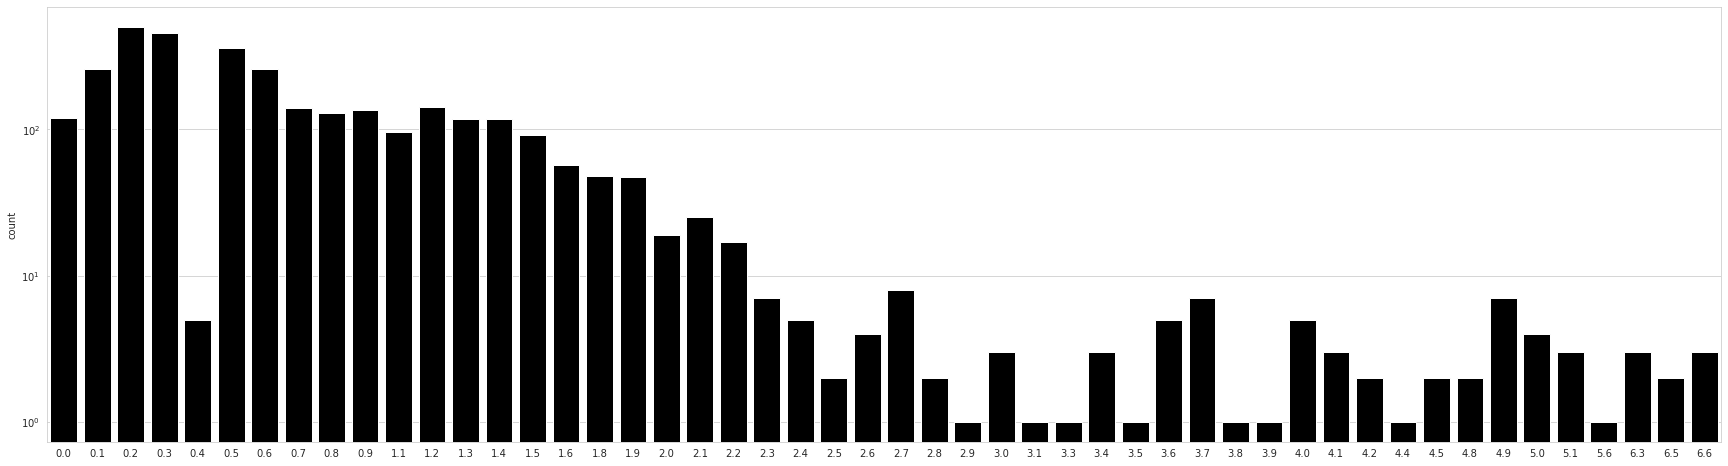

In [13]:
from matplotlib import rcParams
sns.set_style("whitegrid")
rcParams['figure.figsize'] = 30,8
sns.countplot(sorted(list(AluDict3.values())), log=True, color='black')

In [14]:
rb_df2['Divergence']=0.0
for x in rb_df2.index:
    if x in AluDict3.keys():
        rb_df2.at[x,'Divergence']=AluDict3[x]
    else:
        rb_df2.at[x,'Divergence']=100.0
rb_df2

,Unnamed: 0,RepeatBlock,Lengths,Group,Color,Block_Size,Divergence
Alu,,,,,,,
C_AluY_18150388-18150679,0,0,2214,['44615 372 23.9 3.5 3.9 chrY.09-24.01.HET1_ce...,#06D6A0,2000-2999,2.2
C_AluY_18152810-18153098,1,0,2411,['44618 414 24.2 3.9 3.7 chrY.09-24.01.HET1_ce...,#06D6A0,2000-2999,2.4
C_AluY_18155225-18155516,2,0,2411,['44621 410 24.2 3.9 3.8 chrY.09-24.01.HET1_ce...,#06D6A0,2000-2999,2.6
C_AluY_18157634-18157921,3,0,2402,['44624 376 27.0 2.9 3.9 chrY.09-24.01.HET1_ce...,#06D6A0,2000-2999,2.3
C_AluY_18160046-18160334,4,0,2402,['44627 354 20.9 8.6 3.0 chrY.09-24.01.HET1_ce...,#06D6A0,2000-2999,2.9
...,...,...,...,...,...,...,...
+_AluSx_40278206-40278534,3302,30,551,['62441 2114 13.0 0.7 0.0 chrY.09-24.01.HET1_c...,#073B4C,<999,100.0
+_AluJb_40279662-40279812,3303,30,1012,['62443 18 21.8 0.0 0.0 chrY.09-24.01.HET1_cen...,#118AB2,1000-1999,100.0
+_AluSp_40279813-40280110,3304,30,298,['62445 2101 12.8 0.7 0.3 chrY.09-24.01.HET1_c...,#073B4C,<999,100.0


In [16]:
#rb_df2.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG02011/rb_df_Divergence.csv")

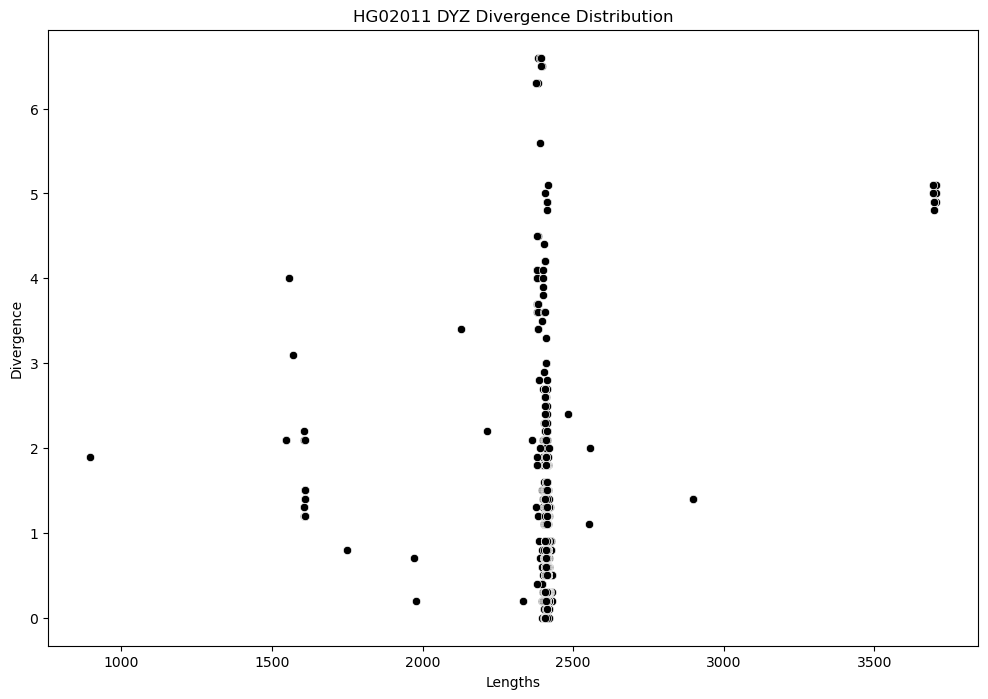

In [19]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 12,8
plt.title("HG02011 DYZ Divergence Distribution")
sns.scatterplot(x=rb_df2[rb_df2['Divergence']!=100.0]['Lengths'], y=rb_df2[rb_df2['Divergence']<100.0]['Divergence'], color='black')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG02011/HG02011_final_Divergence_Dots.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG02011/HG02011_final_Divergence_Dots.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [20]:
palette = {x:'temp' for x in set(rb_df2['Block_Size'])}
palette['1000-1999'] = 'Blue'
palette['2000-2999'] = 'Green'
palette['3000-3999'] = 'Red'
palette['<999'] = 'cyan'

In [27]:
labels

['2000-2999', '1000-1999', '<999', '3000-3999']

[<matplotlib.collections.PathCollection object at 0x7fee54023700>, <matplotlib.collections.PathCollection object at 0x7fee4eeaa220>, <matplotlib.collections.PathCollection object at 0x7fee4eeaa250>, <matplotlib.collections.PathCollection object at 0x7fee4eeaadc0>]
['2000-2999', '1000-1999', '<999', '3000-3999']


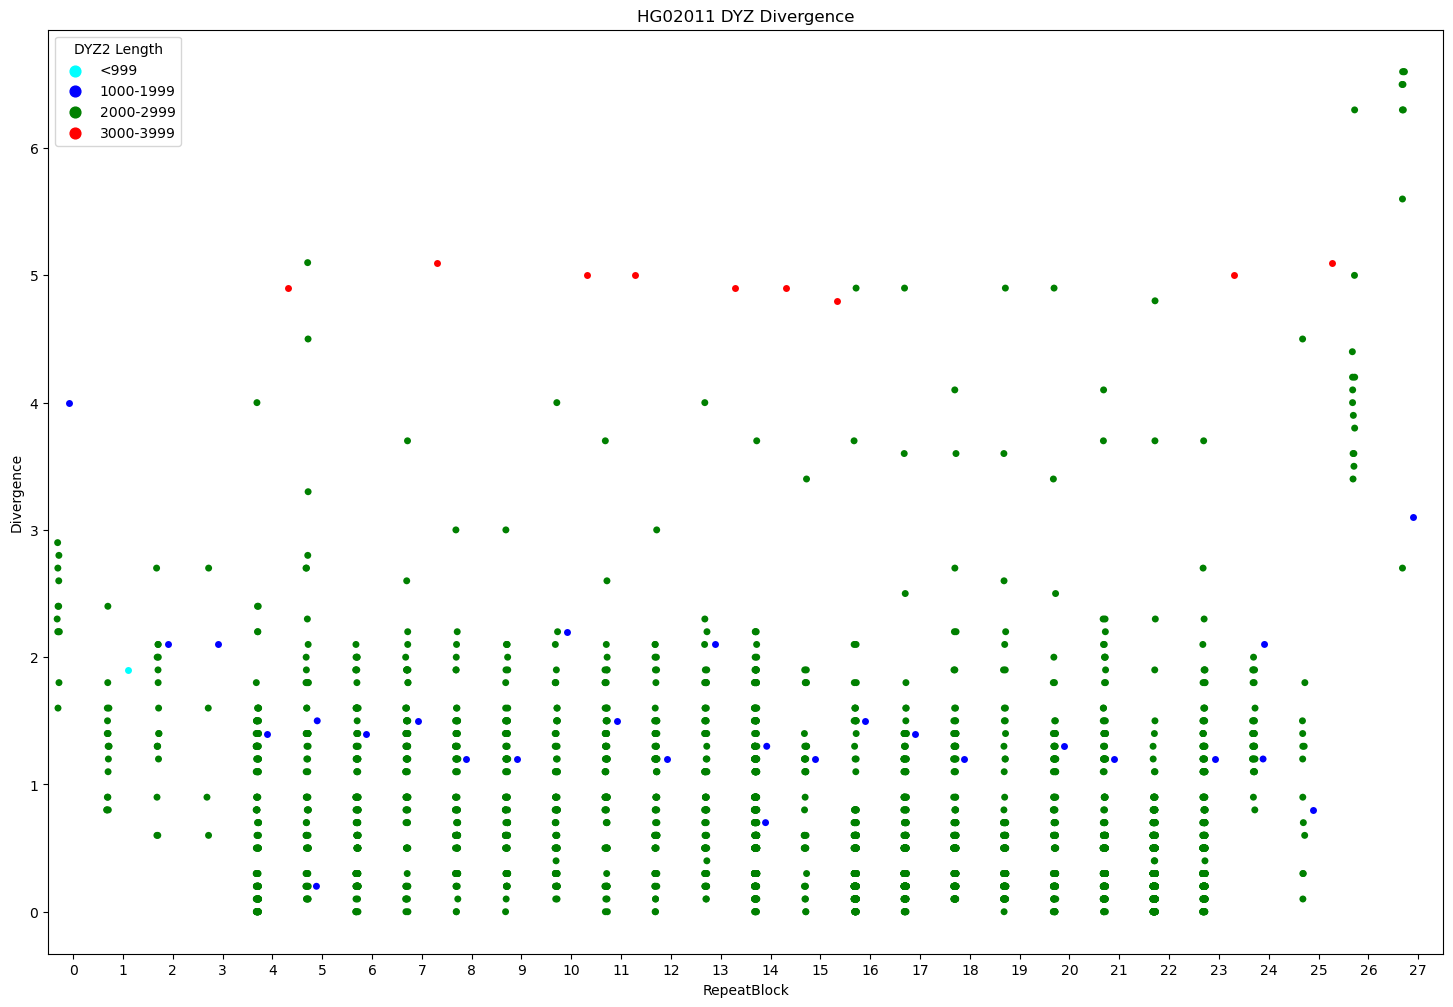

In [29]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 18,12
plt.title("HG02011 DYZ Divergence")
ax=sns.stripplot(x="RepeatBlock", y="Divergence", data=rb_df2[rb_df2['Divergence']!=100.0], dodge=True, hue='Block_Size' , palette=palette)
handles, labels = plt.gca().get_legend_handles_labels()
print(handles)
print(labels)
order = [2,1,0,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='DYZ2 Length')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG02011/HG02011_final_AluSubblock_Dots.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG02011/HG02011_final_AluSubblock_Dots.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [30]:
for key in AluDict2.keys():
    
    if float(rb_df2.at[key,'Divergence']) == 0.0:
        AluDict[key]='lightgrey'
                
    elif float(rb_df2.at[key,'Divergence']) > 0.0 and float(rb_df2.at[key,'Divergence']) <= 1.0:
        AluDict[key]='#538083' # Steel Teal
    
    elif float(rb_df2.at[key,'Divergence']) > 1.0 and float(rb_df2.at[key,'Divergence']) <= 2.0 :
        AluDict[key]='#2A7F62' #Spanish Viridian

    elif float(rb_df2.at[key,'Divergence']) > 2.0 and float(rb_df2.at[key,'Divergence']) <= 4.0 :
        AluDict[key]='#861657' #Pansy Purple
        
    elif float(rb_df2.at[key,'Divergence']) > 4.0 and float(rb_df2.at[key,'Divergence']) <=6.0 :
        AluDict[key]='#E1CE7A' #Flax
        
    elif float(rb_df2.at[key,'Divergence']) > 6.0 and float(rb_df2.at[key,'Divergence']) <=8.0 :
        AluDict[key]='#F06543' #orange soda

    elif float(rb_df2.at[key,'Divergence']) > 8.0 and float(rb_df2.at[key,'Divergence']) <100.0:
        AluDict[key]='#FF1053' #Radical Red

    else:
        print(key)
        AluDict[key]='black'

C_AluY_18167293-18167555
C_AluY_21914637-21914967
C_AluY_28995833-28996155
C_AluY_29218210-29218501
C_AluY_29219634-29219924
C_AluY_29224470-29224761
C_AluY_29225892-29226183
C_AluY_29303322-29303613
C_AluY_29304746-29305037
C_AluY_29306170-29306461
C_AluY_29311007-29311298
C_AluY_29312429-29312720
+_AluY_32974739-32975005
C_AluY_32975111-32975401
+_AluY_35762810-35763076
C_AluY_35763181-35763471
+_AluY_39033956-39034234
+_AluY_40194508-40194808
C_AluSc8_40195095-40195385
+_AluY_40198267-40198562
+_AluSx_40199833-40200146
+_AluSx_40205242-40205551
+_AluSx_40211070-40211477
+_AluSx_40252219-40252528
+_AluJb_40253017-40253043
+_AluJb_40254592-40254858
C_AluJb_40255475-40255689
+_AluSx_40255748-40256027
+_AluJb_40256456-40256747
C_AluJb_40256811-40257103
+_AluSp_40257465-40257758
+_AluSx_40260775-40261070
C_AluSx_40261673-40261835
C_AluJb_40262015-40262308
+_AluSx_40263781-40264073
C_AluJb_40264284-40264568
+_AluSx_40267108-40267409
C_AluSc8_40268977-40269270
+_AluJb_40270176-40270511
+_A

In [31]:
import collections
collections.Counter(AluDict.values())

Counter({'#861657': 99,
         '#2A7F62': 735,
         'black': 80,
         '#538083': 2241,
         'lightgrey': 119,
         '#E1CE7A': 25,
         '#F06543': 8})

## Drawing Blocks

In [33]:
import turtle

In [34]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
groupNames = sorted(set(rb_df2['RepeatBlock']))
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG02011 Yq Heterochromatin Repeat Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(sorted(set(rb_df2['RepeatBlock']))):
    
    totalAlus = len(rb_df2[rb_df2['RepeatBlock']==key])
        
    turtle.color("black")
    turtle.forward(50)
    currentPosition = turtle.position()

    currentPosition = turtle.position()
    
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Repeat Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    for item in list(rb_df2[rb_df2['RepeatBlock']==key].index):
        
        if 'C_' in item:
            turtle.color(AluDict[item])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.right(90)
            turtle.forward(.5)

        
        elif '+_' in item:
            turtle.color(AluDict[item])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.left(90)
            turtle.forward(.5)

        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|█| 31/31 [06:28<00:00, 


In [35]:
from PIL import Image

In [36]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [37]:
ts = turtle.getscreen()
#save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HG02011/HG02011_RM_DYZ_Divergence")

In [38]:
turtle.bye()